In [1]:
# Let's put our learnings from the previous exercise into practice. We will code a method
# `quantize` that quantizes a vector x, given xmin, xmax, and b. It should return the quantized
# values for a given x.
# Objective: Quantize a given vector x using uniform quantization

import numpy as np
# Compute scale
def get_scale(x_min, x_max, b):
    return (x_max - x_min) * 1.0 / (2**b)

"""Quantizing the given vector x."""
def quantize(x, x_min, x_max, b):
    np.clip(x, x_min, x_max, out=x) # Clamp x to lie in range [x_min, x_max]
    
    s = get_scale(x_min, x_max, b)
    x_q = np.floor((x - x_min) / s)

    # Clamp the quantized value to be less than (2^b - 1)
    x_q = np.minimum(x_q, 2**b - 1)

    # Return x_q as unsigned integer
    # unit8 is the smallest data type supported by numpy
    return x_q.astype(np.uint8)


In [2]:
# Testing example for the range [-10, 10], incrementing by 2.5
# We slightly exceed 10.0 to include 10.0 in our range

x = np.arange(-10.0, 10.0 + 1e-6, 2.5)
print(x)
x_quantized = quantize(x, -10.0, 10.0, 3)
print(x_quantized) 

[-10.   -7.5  -5.   -2.5   0.    2.5   5.    7.5  10. ]
[0 1 2 3 4 5 6 7 7]


In [3]:
def dequantize(x_q, x_min, x_max, b):
    # Compute the value of scale the same way
    s = get_scale(x_min, x_max, b)
    x = x_min + (s * x_q)
    return x # Returning only approximate values

print(dequantize(x_quantized, -10.0, 10.0, 3))


[-10.   -7.5  -5.   -2.5   0.    2.5   5.    7.5   7.5]


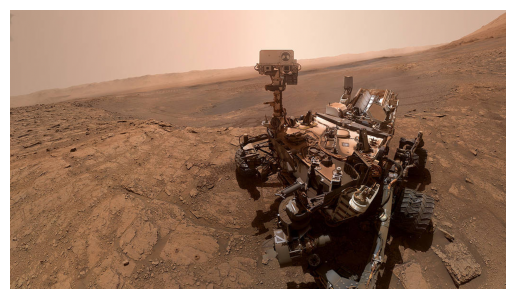

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Interpret the image in the form of a 2D matrix having values in [0.0, 1.0]
img = (mpimg.imread('pia23378-16.jpeg') / 255.0)
plt.axis('off')
plt.imshow(img)


In [11]:
img_min = np.min(img)
img_max = np.max(img)
print('Min: %d, Max: %d' % (img_min, img_max))

Min: 0, Max: 1


In [14]:
def simulate_transmission(img, b):
    transmitted_image = quantize(img, 0.0, 1.0, b)
    decoded_image = dequantize(transmitted_image, 0.0, 1.0, b)
    plt.axis('off')
    plt.imshow(decoded_image)

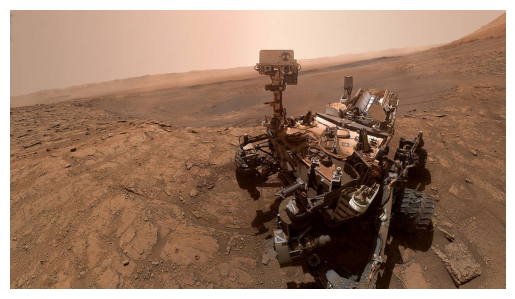

In [18]:
simulate_transmission(img, 8)

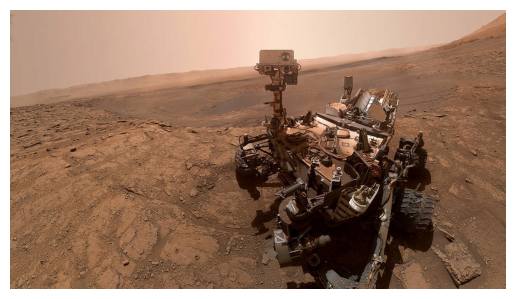

In [22]:
simulate_transmission(img, 7)


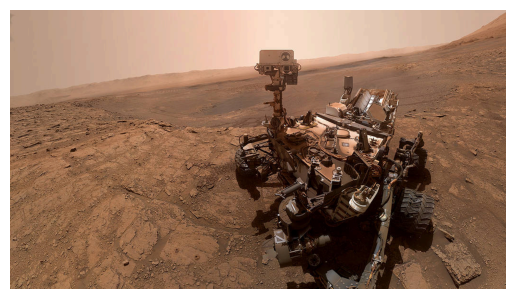

In [27]:
simulate_transmission(img, 6)

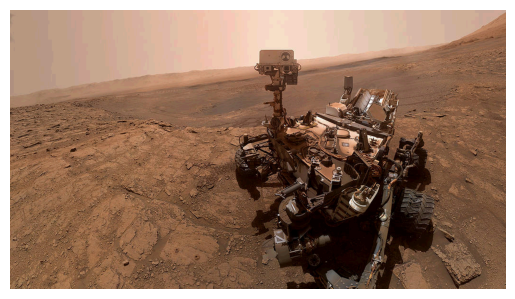

In [28]:
simulate_transmission(img, 5)

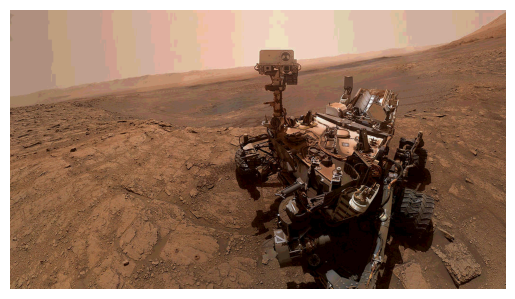

In [25]:
simulate_transmission(img, 4)

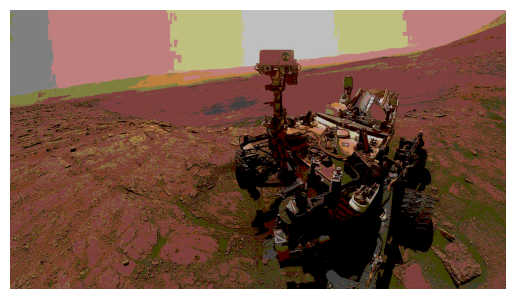

In [26]:
simulate_transmission(img, 2)